# CrowdTangle Data Analysis of South Sudan datasets

## Install Requirements

Ensure that the requirements.txt file is present in the working folder, remove the comment to run the code. Incase this has already been executed on your computer, no need to run it again.

#### List of requirements:
scipy
matplotlib
numpy
pandas
seaborn
altair
plotly
scikit_learn
langdetect 
nltk
PyCrowdTangle
wordcloud
twint
tweepy
coordination_network_toolkit
stop-words
ProText
gensim
python-Levenshtein
GPyM-TM
newscatcher
sentence-transformers

In [1]:
pip install -r requirements.txt #Install packages

Note: you may need to restart the kernel to use updated packages.


## Import relevant Libraries or access Keys

In [1]:
#import relevant Libraries or access Keys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import difflib
import os
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import coordination_network_toolkit as coord_net_tk
import networkx as nx
from langdetect import detect
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import*
from nltk import word_tokenize
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize, TweetTokenizer
from nltk.tag import StanfordNERTagger
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import string
import PyCrowdTangle as pct
import re
from stop_words import get_stop_words
from wordcloud import WordCloud, STOPWORDS
from ProText import gen, low, dig,stopw, lemma, stem, spell, clean_len, WCloud, countvec, tfidf 
import gensim
#import gsdmm
from newscatcher import Newscatcher, urls, describe_url
import glob
import time
import twint
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
CONSUMER_KEY = "EdpKxwaq3Y0cZ0ttXjsdW5TzT"
CONSUMER_SECRET = "3IRzTJvtDFAZW5oPDsUafJkB2GhOT6ShZyyjYJUxzQojEZxwSu"
ACCESS_KEY = "195372430-SJqPnEKfqi5rkErEVBM3HbMvMVBBXlu8Aa7NhUNH"
ACCESS_SECRET = "498nqaYn4ElSlF1ZDTkIBTVELWPk3GCqAIm9qT3l8t7o6"
import configparser
from tweepy import Cursor, TweepError
auth = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)

## Data Descriptions

### data1: A query that extracts all mentions of Russia and South Sudan in one post

CSV Request:

Date range: 2020-09-02 15:04:15 EAT - 2021-09-02 15:04:15 EAT

Search: ("Russia" OR "Russie" OR "روسيا" OR "Россия" OR "俄罗斯" OR "ራሽያ" OR "Russian" OR "روسي" OR "Русский" OR "俄语" OR "ራሺያኛ" OR 🇷🇺) AND ("South Sudan" OR "Sud Soudan" OR "جنوب السودان" OR "южный Судан" OR "南苏丹" OR "ደቡብ ሱዳን" OR 🇸🇸)

## Import Datasets

Import your data, preferably located in the same folder as your your Notebook

In [2]:
os.chdir("/Users/allancheboi/Documents/GitHub/CfA_Partnership_GEC_iLAB/Countries/06. South Sudan/1. Data/04. CrowdTangle")
data1=pd.read_csv("data1_SS_2021-09-02-15-05-02-EAT-search-csv-export.csv")# Crowdtangle dataset
#data2=pd.read_csv('data2_CI_2021-07-01-10-03-55-EAT-search-csv-export.csv')# Crowdtangle dataset
#data3=pd.read_csv('data3_CI_2021-07-01-10-17-11-EAT-search-csv-export.csv')# Crowdtangle dataset
#data4=pd.read_csv('data4_CI_2021-07-01-10-29-50-EAT-search-csv-export.csv')# Crowdtangle dataset
#data5=pd.read_csv("data5_CI_2021-07-01-10-31-55-EAT-search-csv-export.csv")# Crowdtangle dataset
#data6=pd.read_csv("data6_CI_2021-07-02-11-55-41-EAT-search-csv-export.csv")# Crowdtangle dataset

### Select dataset to analyse

In [3]:
# Make a copy of my dataset
data=data1.copy()

#### View the first row of data 1 (test of Accuracy)

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 50
pd.options.display.max_rows = None
data.head (1)

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score
0,معرض الكرة العراقية المصور,iraqgfpg,100050503778976,VIDEO_CREATOR,IQ,اخبار كرة القدم العراقية والعربية والعالمية,2011-02-22 07:08:24,2320574.0,2579687.0,2021-06-21 14:04:18 EAT,2021-06-21,14:04:18,Photo,"10,487",9019,1277,36,124,5,9,1,1,15,NaN,-,0,0,0,NaN,https://www.facebook.com/100050503778976/posts...,يوم حافل بالمباريات حتى فجر يوم غد #هل ستتابع ...,https://www.facebook.com/photo.php?fbid=371699...,NaN,‎'‎مباريات اليوم هولندا بطولة امم اوروبا 2021 ...,NaN,NaN,NaN,NaN,NaN,"10,487",-1.47


#### View the number of Rows and Columns in data 1 (This should match what was downloaded from CrowdTangle (test of completeness)

In [5]:
data.shape

(2956, 41)

## CrowdTangle data Analysis

In [6]:
#Remove duplicates
data=data.drop_duplicates().reset_index().drop('index', axis=1)

In [7]:
#introducing Count variable for counting and graph purposes in each of CrowdTangle dataset
for i in range(data1.shape[0]):
    data.loc[i, 'Count']=1

### WordCloud of the data to show the top conversations

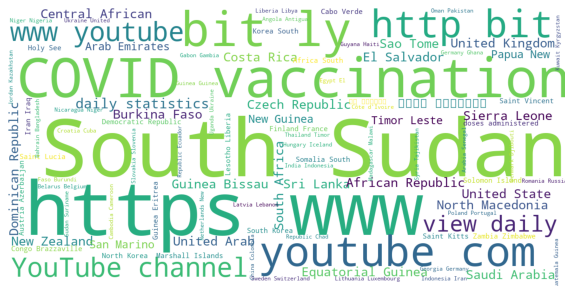

In [8]:
## WordCloud of Facebook Posts 
stop_words = get_stop_words('fr')+get_stop_words('en') # if posts are in french otherwise use STOPWORDS
#from stop_words import safe_get_stop_words
#stop_words = safe_get_stop_words('unsupported language')
text = ' '.join([str(x) for x in data['Message'].values if pd.notnull(x)])
wc = WordCloud(stopwords=stop_words,background_color='white',max_words=200,scale=3).generate(text)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc)
plt.show()

### Visualising the Messages with the highest Total Interactions

In [9]:
#Create total interactions variable
for i in range(data.shape[0]):
    data.loc[i,'interactions']=data.loc[i,'Likes']+data.loc[i,'Comments']+data.loc[i,'Shares']+data.loc[i,'Love']+data.loc[i,'Wow']+data.loc[i,'Haha']+data.loc[i,'Sad']+data.loc[i,'Angry']+data.loc[i,'Care']

In [10]:
# Top 15 posts with high number of Total Interactions
data_Ls=data.pivot_table(values=['interactions'], index='Message', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='interactions', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

alt.Chart(...)

In [11]:
## print table with Message and their links
table=pd.DataFrame()
for i in range(15):
    table.loc[i, 'Message']=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    k=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    l=data[data['Message']==k]['URL'].tolist()
    table.loc[i, 'Link']=l[0]# you can take every number in range(len(l)) incase an url doesn't open 
table

,Message,Link
0,يوم حافل بالمباريات حتى فجر يوم غد #هل ستتابع ...,https://www.facebook.com/100050503778976/posts...
1,#أطول طريق في العالم للمشي 1_ هو طريق من كيب ت...,https://www.facebook.com/100044270512210/posts...
2,هل يمكن تطبيق عقوبات علي مصر بعد ضرب سد النهضة...,https://www.facebook.com/563342880526617/posts...
3,There is a straight line between Liberia and C...,https://www.facebook.com/660513290659089/posts...
4,China calls for lifting unilateral sanctions o...,https://www.facebook.com/188625661189259/posts...
5,هذا أطول طريق بري (مستقيم) يربط أقصى نقطتين، ي...,https://www.facebook.com/100044588257147/posts...
6,أطول طريق في العالم للمشي هو من كيب تاون ( جنو...,https://www.facebook.com/266667527536483/posts...
7,আগেই নিশ্চিত করুন কম খরচে বিমান টিকিট ঘরে বসে ...,https://www.facebook.com/108025417290684/posts...
8,الحكومة البريطانية تفرض عقوبات على أشرف سيدأحم...,https://www.facebook.com/572826299795754/posts...
9,اولا : - الحمدلله كل اللي اتكلمنا فيه اثبتت ال...,https://www.facebook.com/563342880526617/posts...


In [12]:
# To access to the full link
table.loc[1, 'Link']

'https://www.facebook.com/100044270512210/posts/275797633905918'

### Page Admin Top Country Analysis & Visualisation

This is used to determine where most of the accounts in the conversation are being run from. This does not give a total indication of No influence from the other countries, because troll farms can be created in the Target countries e.g. using local NGOs, CSOs etc.

#### Visualising where majority of the pages posting are administered from uding 'Page Admin Top Country'

In [13]:
data_Ls=data.pivot_table(values=['Count'], index='Page Admin Top Country', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(50)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Page Admin Top Country:N', sort='-x'), color='Page Admin Top Country', tooltip=['Page Admin Top Country']).interactive()

alt.Chart(...)

#### Viewing the top 100 posts from accounts being run from a selected country

In [15]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = None
data_Filter = data[data['Page Admin Top Country'] =='RU'][['Message','Link','Page Name']]
data_Filter.head(100)

,Message,Link,Page Name
96,"На этой карте показан один из самых длинных в мире непрерывных пешеходных маршрутов. Начинается он в городе Кейптаун, ЮАР, а заканчивается в Магадане, Россия. Длина маршрута 22 387 км. По оценкам ...",https://www.facebook.com/svmayak/photos/a.1874320566171729/2789378361332607/?type=3,Северный Маяк
308,"🇷🇺 🤝 🇸🇸 Exactly ten years ago, on August 22, 2011, Russia and the Republic of South Sudan established diplomatic relations. Our country recognised the young African state as soon as it gained inde...",https://www.facebook.com/MIDRussia/photos/a.265191980246917/3685791588186922/?type=3,Russian Foreign Ministry - МИД России
412,🇷🇺 🤝 🇸🇸 Ровно 10 лет назад – 22 августа 2011 года – были установлены дипломатические отношения между Россией и Республикой Южный Судан. Наша страна признала молодое африканское государство сразу ж...,https://www.facebook.com/MIDRussia/photos/a.480802735352506/3684555961643818/?type=3,Russian Foreign Ministry - МИД России
517,"🇷🇺 🇸🇸14 мая находившийся с рабочей поездкой в Джубе специальный представитель Президента Российской Федерации по Ближнему Востоку и странам Африки, заместитель Министра иностранных дел России М.Л....",https://www.facebook.com/MIDRussia/photos/a.265191980246917/3413122405453843/?type=3,Russian Foreign Ministry - МИД России
544,🗓️ Договор о нераспространении ядерного оружия (ДНЯО) был открыт для подписания 1 июля 1968 г. и вступил в силу 5 марта 1970 г. Его участниками являются 191 государство. Договор не подписали Индия...,https://www.facebook.com/MIDRussia/photos/a.265191980246917/3221830584583027/?type=3,Russian Foreign Ministry - МИД России
605,"🇷🇺🇺🇬 Посольство России в Уганде: ❗️ О рабочей поездке специального представителя Президента Российской Федерации по Ближнему Востоку и странам Африки, заместителя Министра иностранных дел России М...",https://www.facebook.com/RusEmbUganda/photos/a.1237953799640757/3372427642860018/?type=3,Russian Foreign Ministry - МИД России
627,"🗓 The UN Food and Agriculture Organisation (FAO) was established on October 16, 1945. ℹ️ It was the International Conference on Food and Agriculture that adopted the decision to establish a specia...",https://www.facebook.com/MIDRussia/photos/a.265191980246917/2874707982628624/?type=3,Russian Foreign Ministry - МИД России
862,"Не детский вопрос: как спасти поколение? Дети и подростки сегодня, в отличие от предшествовавших им поколений, имеют много возможностей для реализации своего потенциала. Для их развития существуют...",https://www.facebook.com/islam.today.russia/photos/a.450939608303176/4289824411081324/?type=3,Ислам сегодня
880,"Агентство ООН по делам беженцев совместно с ТАСС выпустили спецпроект «От перемены мест» о людях, которые были вынуждены покинуть свои дома. В проекте три части. В первой дана статистика по ситуац...",https://www.facebook.com/refugee.ru/photos/a.125151214175194/3985764684780475/?type=3,Комитет Гражданское Содействие
989,ПОСОЛЬСТВО РОССИИ ОПРОВЕРГЛО СООБЩЕНИЯ О ПРИОСТАНОВКЕ СОГЛАШЕНИЯ О БАЗЕ ВМФ НА КРАСНОМ МОРЕ В СУДАНЕ Появившиеся сообщения о приостановке действия соглашения между Суданом и Россией о создании мор...,https://www.facebook.com/AlphaSpecnaz/photos/a.299303000197933/3746602662134599/?type=3,"Газета «Спецназ России» и журнал ""Разведчик"""


In [16]:
data_Filter.shape

(21, 3)

#### Sorting the posts from the selected country by the date of creation

In [18]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = None
data_Filter = data[data['Page Admin Top Country'] =='RU'][['Message','Link','Page Name','Likes at Posting', 'Post Created']]
data_Filter.sort_values('Post Created', ascending=False)

,Message,Link,Page Name,Likes at Posting,Post Created
308,"🇷🇺 🤝 🇸🇸 Exactly ten years ago, on August 22, 2011, Russia and the Republic of South Sudan established diplomatic relations. Our country recognised the young African state as soon as it gained inde...",https://www.facebook.com/MIDRussia/photos/a.265191980246917/3685791588186922/?type=3,Russian Foreign Ministry - МИД России,416835.0,2021-08-22 19:51:09 EAT
412,🇷🇺 🤝 🇸🇸 Ровно 10 лет назад – 22 августа 2011 года – были установлены дипломатические отношения между Россией и Республикой Южный Судан. Наша страна признала молодое африканское государство сразу ж...,https://www.facebook.com/MIDRussia/photos/a.480802735352506/3684555961643818/?type=3,Russian Foreign Ministry - МИД России,416835.0,2021-08-22 10:16:31 EAT
1913,"Не детский вопрос: как спасти поколение? Дети и подростки сегодня, в отличие от предшествовавших им поколений, имеют много возможностей для реализации своего потенциала. Для их развития существуют...",https://www.facebook.com/iliketatarstan/photos/a.531151940280307/4339296292799167/?type=3,Iliketatarstan,48254.0,2021-05-31 10:01:30 EAT
1729,"Не детский вопрос: как спасти поколение? Дети и подростки сегодня, в отличие от предшествовавших им поколений, имеют много возможностей для реализации своего потенциала. Для их развития существуют...",https://www.facebook.com/huzurtvarabic/photos/a.866000483488610/4222182224537069/?type=3,Ислам,60776.0,2021-05-31 10:00:54 EAT
1436,"Не детский вопрос: как спасти поколение? Дети и подростки сегодня, в отличие от предшествовавших им поколений, имеют много возможностей для реализации своего потенциала. Для их развития существуют...",https://www.facebook.com/dla.musulman/photos/a.1062578937087318/5845030695508761/?type=3,Для Мусульман,NaN,2021-05-31 10:00:26 EAT
862,"Не детский вопрос: как спасти поколение? Дети и подростки сегодня, в отличие от предшествовавших им поколений, имеют много возможностей для реализации своего потенциала. Для их развития существуют...",https://www.facebook.com/islam.today.russia/photos/a.450939608303176/4289824411081324/?type=3,Ислам сегодня,329914.0,2021-05-31 10:00:26 EAT
2164,NaN,https://www.facebook.com/RusEmbUganda/photos/a.1237953799640757/3372427642860018/?type=3,Ambassade de la Russie au Sénégal,10281.0,2021-05-18 11:53:20 EAT
605,"🇷🇺🇺🇬 Посольство России в Уганде: ❗️ О рабочей поездке специального представителя Президента Российской Федерации по Ближнему Востоку и странам Африки, заместителя Министра иностранных дел России М...",https://www.facebook.com/RusEmbUganda/photos/a.1237953799640757/3372427642860018/?type=3,Russian Foreign Ministry - МИД России,416314.0,2021-05-17 22:58:19 EAT
517,"🇷🇺 🇸🇸14 мая находившийся с рабочей поездкой в Джубе специальный представитель Президента Российской Федерации по Ближнему Востоку и странам Африки, заместитель Министра иностранных дел России М.Л....",https://www.facebook.com/MIDRussia/photos/a.265191980246917/3413122405453843/?type=3,Russian Foreign Ministry - МИД России,416347.0,2021-05-14 20:42:45 EAT
2790,"OPEC+ OVERPRODUCTION 3.3 MBD In fact, the overproduction has worsened, rising from 3.027 million b/d in February and 2.793 million b/d in January, the data shows. Russia, the largest non-OPEC part...",https://wognews.net/news/2021/5/opec-overproduction-3.3-mbd#.YJUy0fOCKZM.facebook,World Energy Oil Gas News Trends,13374.0,2021-05-07 15:30:22 EAT


#### Check for simlarity in messages shared in the different groups above

In [18]:
# Downloading model
Sentences=data['Message'].to_list()
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [19]:
# Sentence Embeddings
sentence_embeddings = model.encode(Sentences)

Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x7f8c21bb9550>
Traceback (most recent call last):
  File "/Users/allancheboi/opt/anaconda3/lib/python3.7/site-packages/tqdm/notebook.py", line 222, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


TypeError: 'float' object is not subscriptable

In [ ]:
sentence_embeddings.shape

In [ ]:
L=cosine_similarity(
    [sentence_embeddings[0]],
    sentence_embeddings[1:]
)

In [ ]:
for i in range(data.shape[0]):
  L=cosine_similarity([sentence_embeddings[i]],np.delete(sentence_embeddings, i, 0))
  T=L.tolist()[0]
  K=[e for e, j in enumerate(T) if j == max(T)]
  data.loc[i, 'Score']=max(T)
  K_1=[e for e in K if e >=i ]
  ls_1=[elem for elem in K]
  ls=' '.join([str(elem) for elem in K])
  for j in ls_1:
    if j in K_1:
      ls=ls.replace(str(j), str(j+1))
  data.loc[i, 'index']=ls

In [ ]:
data

In [ ]:
#data.loc[84, 'Message']
#data.loc[80, 'Message']
#data.loc[40, 'Message']
#data.loc[0, 'Message']

#### Identify the Most active accounts

In [20]:
# Top 15 Most Active Pages about the topic and within the considered period
data_Ls=data.pivot_table(values=['Count'], index='Page Name', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Page Name:N', sort='-x'), color='Page Name', tooltip=['Page Name']).interactive()

alt.Chart(...)

In [22]:
# To access to the full links to the accounts


#### Identify the links or URLs that have been shared the most

In [23]:
data_Ls=data.pivot_table(values=['Count'], index='Link', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Link:N', sort='-x'), color='Link', tooltip=['Link']).interactive()

alt.Chart(...)

In [ ]:
# To access to the full links
